# Beispiel für Datenanalyse

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [14]:
path = r"E:\Workspaces\Kurse\aktueller-kurs\Material\WA_Fn-UseC_-Telco-Customer-Churn.csv"

## Hilfsfunktionen

In [16]:
def data_repair(df):
    # Das geht sicher auch in pandas oder numpy, aber wir haben es selbst gemacht, da einfacher :-D
    daten = df.to_dict(orient="records")
    for row in daten:
        try:
            row["TotalCharges"] = float(row["TotalCharges"])
        except ValueError:
            row["TotalCharges"] = int(row["tenure"]) * float(row["MonthlyCharges"])
    return pd.DataFrame(daten)

def filter_missing_values(df):
    df = df.loc[df["TotalCharges"] != " "].copy()
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])
    return df

def show_plot(df, col_a, col_b, header=None, x_label=None, y_label=None):
    if not x_label:
        x_label = col_a
    if not y_label:
        y_label = col_b
    if not header:
        header = f"{col_a} vs {col_b}"

    plt.figure(figsize=(14,7))
    #ax = plt.gca()  # Get the current axes instance
    #ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.scatter(df[col_a], df[col_b])
    plt.title(header)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

## Daten einlesen

In [17]:
df = pd.read_csv(path)
df_kosten = df[["tenure", "MonthlyCharges", "TotalCharges"]]

## Voranalyse

In [18]:
print(df_kosten.dtypes)
print(df_kosten[df_kosten['TotalCharges'] == ' '].index)
print(len(df_kosten))

tenure              int64
MonthlyCharges    float64
TotalCharges       object
dtype: object
Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')
7043


## Vergleich Korrekturverfahren

In [19]:
df_kosten_1 = filter_missing_values(df_kosten)
df_kosten_2 = data_repair(df_kosten)


## Auswertung Korrekturegebnisse

In [20]:
print(len(df_kosten_1))
print(len(df_kosten_2))


7032
7043


## Grafiken

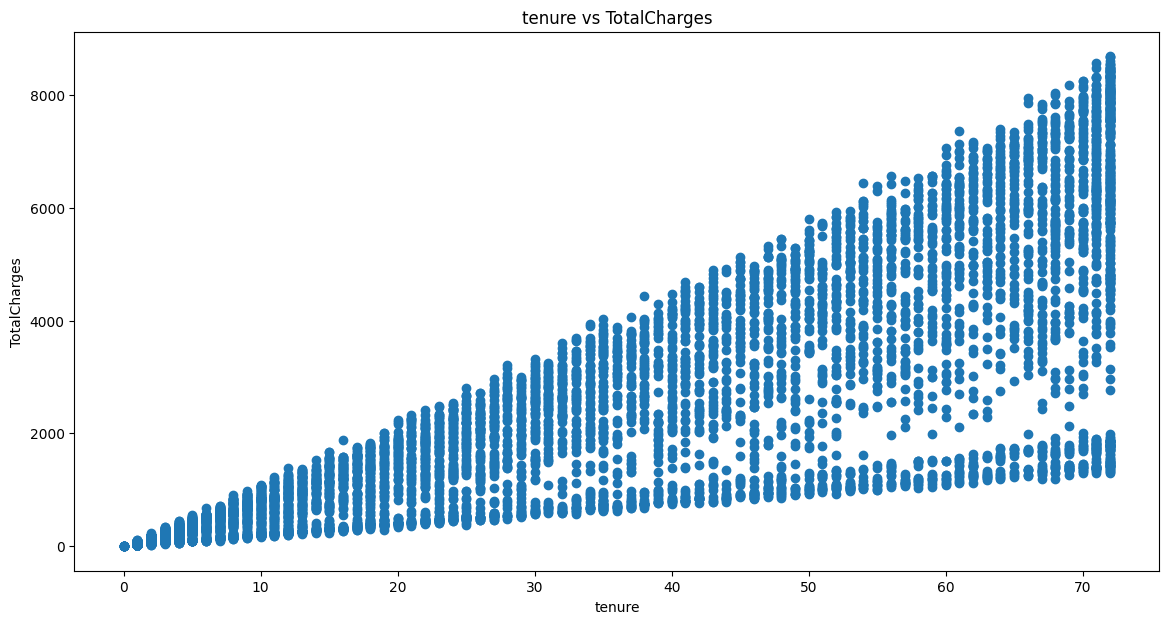

In [21]:
show_plot(df_kosten_2, "tenure", "TotalCharges")

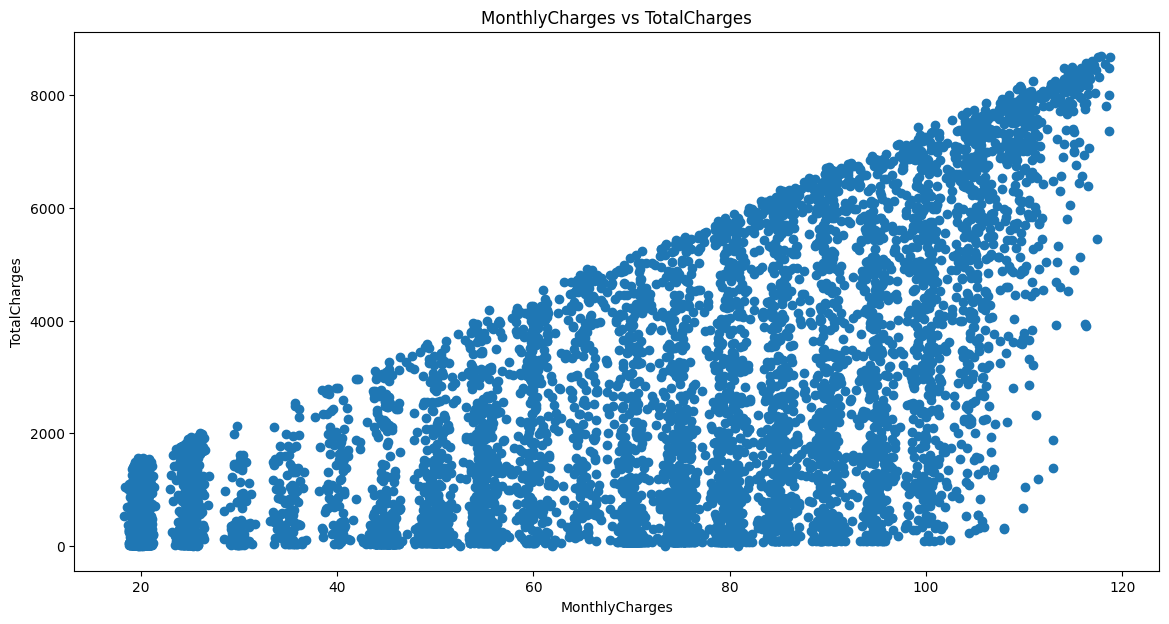

In [22]:
show_plot(df_kosten_2, "MonthlyCharges", "TotalCharges")